In [53]:
#importing libraries
import numpy as np
import pandas as pd

#visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
#reading data
df_survey = pd.read_csv('C:/Users/kwame.adu/Desktop/Kwame/Learning/Data Science/survey_results_public.csv')

In [55]:
df_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 61 columns):
Respondent                      64461 non-null int64
MainBranch                      64162 non-null object
Hobbyist                        64416 non-null object
Age                             45446 non-null float64
Age1stCode                      57900 non-null object
CompFreq                        40069 non-null object
CompTotal                       34826 non-null float64
ConvertedComp                   34756 non-null float64
Country                         64072 non-null object
CurrencyDesc                    45472 non-null object
CurrencySymbol                  45472 non-null object
DatabaseDesireNextYear          44070 non-null object
DatabaseWorkedWith              49537 non-null object
DevType                         49370 non-null object
EdLevel                         57431 non-null object
Employment                      63854 non-null object
Ethnicity                

In [56]:
#view first five rows of data
df_survey.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [57]:
# Question 1
# 1. What are the common technologies used?
# 1.a Common database
# 1.b Web framework
# 1.c platform worked with
# 1.d Collaboration tools worked with
# 1.e Languages worked with


In [58]:
#selecting required columns
df_data = df_survey[['DatabaseWorkedWith', 'WebframeWorkedWith', 'PlatformWorkedWith', 'NEWCollabToolsWorkedWith', 'LanguageWorkedWith']]
df_data = df_data[df_survey.Country == "Ghana"]
df_data.head()

,DatabaseWorkedWith,WebframeWorkedWith,PlatformWorkedWith,NEWCollabToolsWorkedWith,LanguageWorkedWith
547,MySQL;Redis;SQLite,Express,Android,Github;Facebook Workplace;Microsoft Azure;Trel...,Java;JavaScript;Kotlin;TypeScript
1523,MySQL;Redis,jQuery;Laravel,AWS;Docker;Heroku,"Github;Gitlab;Slack;Trello;Google Suite (Docs,...",PHP
2047,Firebase;MySQL,Django,Android;Heroku,Github,Dart;HTML/CSS;Java;JavaScript;Python
5120,IBM DB2,Flask,NaN,Facebook Workplace,C#;Julia
9745,MySQL,Angular;Spring,Android;Heroku;iOS;Microsoft Azure,Github;Microsoft Teams;Microsoft Azure,Java;SQL;Swift;TypeScript


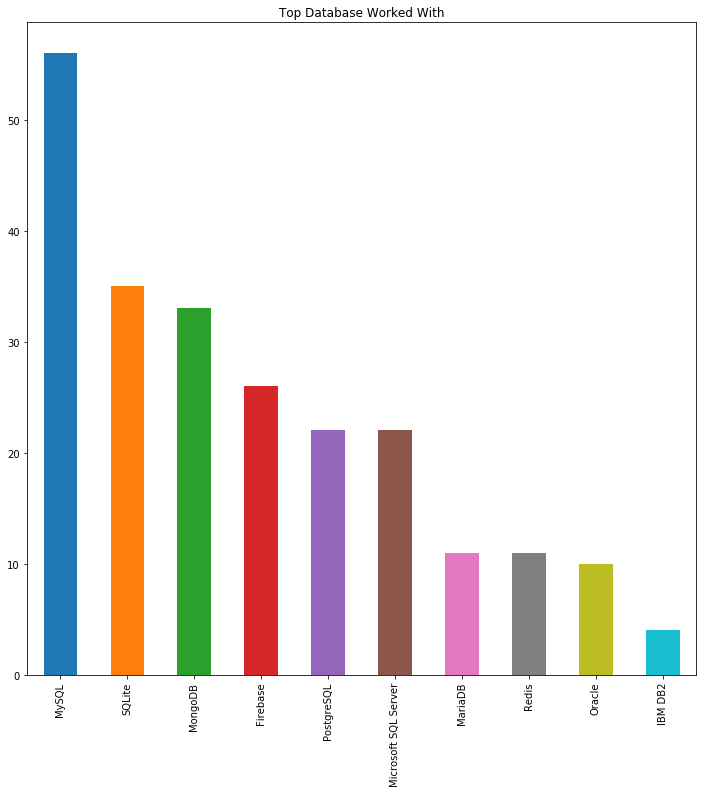

In [62]:
database = df_data['DatabaseWorkedWith'].str.split(';', expand=True).stack().value_counts().head(10)

plt.figure(figsize=(12,12))
plt.title('Top Database Worked With')
database.plot(kind="bar")

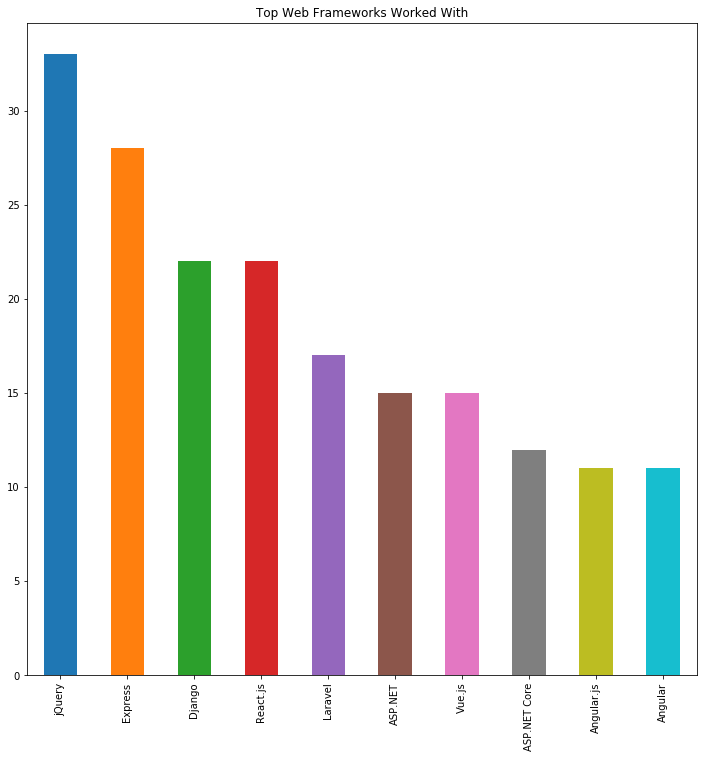

In [63]:
webframe = df_data['WebframeWorkedWith'].str.split(';', expand=True).stack().value_counts().head(10)

plt.figure(figsize=(12,12))
plt.title('Top Web Frameworks Worked With')
webframe.plot(kind="bar")

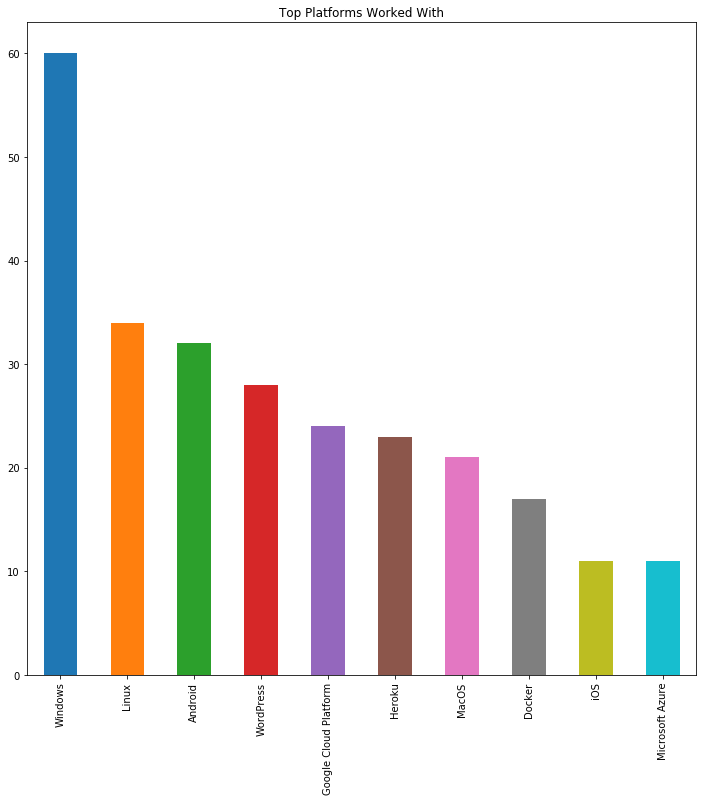

In [64]:
webframe = df_data['PlatformWorkedWith'].str.split(';', expand=True).stack().value_counts().head(10)

plt.figure(figsize=(12,12))
plt.title('Top Platforms Worked With')
webframe.plot(kind="bar")

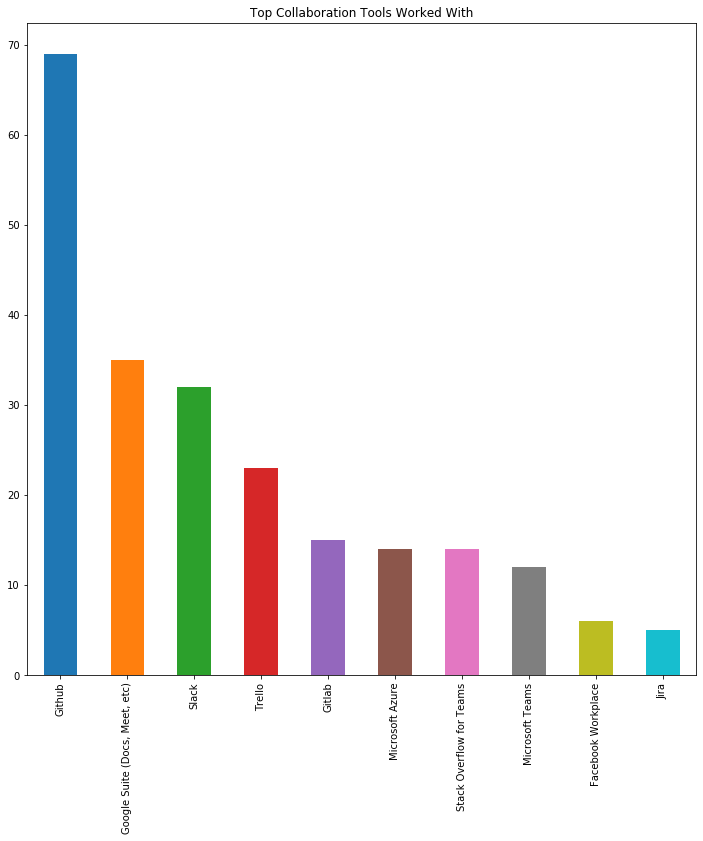

In [65]:
collabtools = df_data['NEWCollabToolsWorkedWith'].str.split(';', expand=True).stack().value_counts().head(10)

plt.figure(figsize=(12,12))
plt.title('Top Collaboration Tools Worked With')
collabtools.plot(kind="bar")

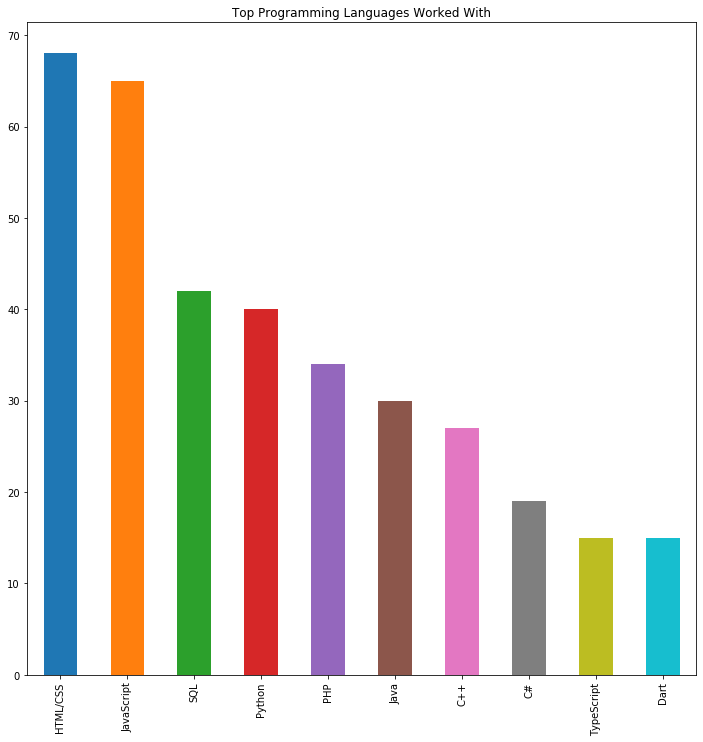

In [66]:
language = df_data['LanguageWorkedWith'].str.split(';', expand=True).stack().value_counts().head(10)

plt.figure(figsize=(12,12))
plt.title('Top Programming Languages Worked With')
language.plot(kind="bar")

In [ ]:
# Question 2
2. What are the work habits and experience?
Average work week, years coding and years of professional code.

In [36]:
df_data2 = df_survey[['CompTotal', 'WorkWeekHrs', 'YearsCode', 'YearsCodePro']]
df_data2 = df_data2[df_survey.Country == "Ghana"]
df_data2.dropna()
df_data2.head()

,CompTotal,WorkWeekHrs,YearsCode,YearsCodePro
547,3800.0,40.0,7,4
1523,2000.0,40.0,14,8
2047,NaN,NaN,2,NaN
5120,NaN,NaN,NaN,NaN
9745,NaN,9.0,6,2


In [35]:
df_data2.describe(include = 'all')

,CompTotal,WorkWeekHrs,YearsCode,YearsCodePro
count,2.900000e+01,39.000000,92,42
unique,NaN,NaN,16,11
top,NaN,NaN,3,3
freq,NaN,NaN,16,7
mean,4.612952e+04,36.153846,NaN,NaN
std,1.996775e+05,27.188948,NaN,NaN
min,4.060000e+02,3.000000,NaN,NaN
25%,2.000000e+03,17.500000,NaN,NaN
50%,3.800000e+03,40.000000,NaN,NaN
75%,8.500000e+03,42.500000,NaN,NaN


In [3]:
df_survey['CompTotal'] = df_survey['CompTotal'].fillna(0)
salary = df_survey.dropna(subset=['Country', 'CompTotal'], axis=0)
salary = df_survey[['Country', 'CompTotal']]
salary.head(10)

,Country,CompTotal
0,Germany,0.0
1,United Kingdom,0.0
2,Russian Federation,0.0
3,Albania,0.0
4,United States,0.0
5,Germany,0.0
6,India,0.0
7,United States,116000.0
8,Tunisia,0.0
9,United Kingdom,25000.0


In [ ]:
graph = salary.sort_values(['Production'], ascending=False).head(10)
graph['Production'].head(10).plot(kind="barh")
plt.show()

In [8]:
salary_data = salary.groupby("Country")["CompTotal"].sum().sort_values()
salary_data.head(50)

Country
Mozambique                                0.0
Gabon                                     0.0
Gambia                                    0.0
Congo, Republic of the...                 0.0
Kiribati                                  0.0
Chad                                      0.0
Cape Verde                                0.0
Libyan Arab Jamahiriya                    0.0
Liechtenstein                             0.0
Mali                                      0.0
Burundi                                   0.0
Marshall Islands                          0.0
Micronesia, Federated States of...        0.0
Eritrea                                   0.0
Nauru                                     0.0
North Korea                               0.0
Djibouti                                  0.0
Solomon Islands                           0.0
Papua New Guinea                          0.0
Timor-Leste                               0.0
Saint Lucia                               0.0
Tajikistan                